<a href="https://colab.research.google.com/github/AnnaPikuleva/Test_GETT/blob/main/Testovoe_GETT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/slgero/testovoe/tree/master/Gett

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Тестовое задание в команду продуктовой аналитики, Gett.

В папке с заданием два датасета - data_orders - содержит выборку данных по заказам пользователей и включает такие колонки как:
* order_datetime -  время заказа
* origin_longitude - долгота
* origin_latitude - широта
* m_order_eta - время до прибытия машины
* order_gk - номер заказа
* order_status_key - статус (4 - отменен клиентом, 9 - отменен системой (reject))
* is_driver_assigned_key - был ли назначен водитель
* cancellations_time_in_seconds - сколько секунд прошло до отмены

data_offers - содержит пары номер заказа - ID оффера, который был предложен водителю по данному заказу.


В момент когда клиент нажимать на кнопку "Заказать" в приложении, система матчинга подыскивает наиболее релевантых водителей и предлагаем им заказ. В задании предлагается исследовать некоторые метрики матчинга для заказов, которые не завершились успешно (клиент в итоге не получил машину). 

In [ ]:
! wget https://github.com/slgero/testovoe/raw/master/Gett/data/data_offers.csv

--2022-06-03 13:02:31--  https://github.com/slgero/testovoe/raw/master/Gett/data/data_offers.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/slgero/testovoe/master/Gett/data/data_offers.csv [following]
--2022-06-03 13:02:31--  https://raw.githubusercontent.com/slgero/testovoe/master/Gett/data/data_offers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9027819 (8.6M) [text/plain]
Saving to: ‘data_offers.csv’

data_offers.csv     100%[===================>]   8.61M  --.-KB/s    in 0.04s   

2022-06-03 13:02:32 (213 MB/s) - ‘data_offers.csv’ saved [9027819/9027819]



In [ ]:
!wget https://github.com/slgero/testovoe/raw/master/Gett/data/data_orders.csv

--2022-06-03 13:02:32--  https://github.com/slgero/testovoe/raw/master/Gett/data/data_orders.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/slgero/testovoe/master/Gett/data/data_orders.csv [following]
--2022-06-03 13:02:32--  https://raw.githubusercontent.com/slgero/testovoe/master/Gett/data/data_orders.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 571786 (558K) [text/plain]
Saving to: ‘data_orders.csv’

data_orders.csv     100%[===================>] 558.38K  --.-KB/s    in 0.02s   

2022-06-03 13:02:32 (31.2 MB/s) - ‘data_orders.csv’ saved [571786/571786]



**0.** Подготовка данных

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/data_orders.csv')

In [ ]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [ ]:
df.isna().mean()

order_datetime                   0.000000
origin_longitude                 0.000000
origin_latitude                  0.000000
m_order_eta                      0.737402
order_gk                         0.000000
order_status_key                 0.000000
is_driver_assigned_key           0.000000
cancellations_time_in_seconds    0.318122
dtype: float64

In [ ]:
df['order_gk'].duplicated().mean()

0.0

**1.** Постройте распределение заказов по причинам неуспеха: отмены до и после назначения водителя, режекты

In [ ]:
df['order_status_key'].value_counts()

4    7307
9    3409
Name: order_status_key, dtype: int64

In [ ]:
df['order_status_key'].value_counts(normalize=True)

4    0.681878
9    0.318122
Name: order_status_key, dtype: float64

In [ ]:
df.groupby(['is_driver_assigned_key','order_status_key'])['order_gk'].count().reset_index()

,is_driver_assigned_key,order_status_key,order_gk
0,0,4,4496
1,0,9,3406
2,1,4,2811
3,1,9,3


In [ ]:
df[df['is_driver_assigned_key']==0]['order_status_key'].value_counts(normalize=True)

4    0.56897
9    0.43103
Name: order_status_key, dtype: float64

Водитель не назначен: отмена по инциативе клиента происходит практически с той же вероятностью, что и отмена по инциативе системы

In [ ]:
df[df['is_driver_assigned_key']==1]['order_status_key'].value_counts(normalize=True)

4    0.998934
9    0.001066
Name: order_status_key, dtype: float64

В случае если водитель назначен, то отмена происходит по инициативе клиента почти со 100% долей

In [ ]:
df['fail'] = (df['order_status_key'] == 9)*1

In [ ]:
df.groupby('is_driver_assigned_key')['fail'].agg(['count','mean'])

,count,mean
is_driver_assigned_key,,
0,7902,0.431030
1,2814,0.001066


In [ ]:
df['fail'].mean()

0.3181224337439343

**2.** Постройте график распределения фейлов по часам - наблюдается ли тендеция, что в какие то часы доля той или иной категории аномально высока?

In [ ]:
df['hour'] = df['order_datetime'].str[:2]

In [ ]:
t = df.groupby('hour')['fail'].agg(['count','mean'])

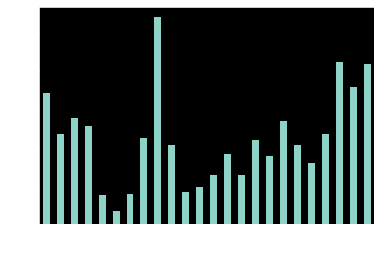

In [ ]:
t['count'].plot(kind='bar')

В какие часы фейлов больше всего? Чем это можно объяснить?

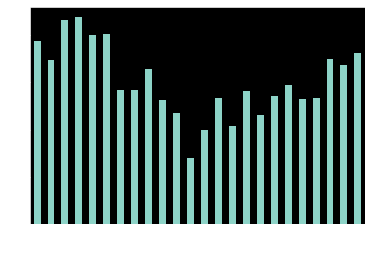

In [ ]:
t['mean'].plot(kind='bar')

В ночные часы доля заказов отмененных системой выше чем днем. Возможно это связано с недостаточным количеством водителей.

**3**. Постройте графики среднего времени до отмены (cancellations_time_in_seconds) с водителем и без, по часам. Если есть выбросы в данных - лучше удалить. Можно ли сделать выводы по этому графику?

In [ ]:
df.isna().mean()

order_datetime                   0.000000
origin_longitude                 0.000000
origin_latitude                  0.000000
m_order_eta                      0.737402
order_gk                         0.000000
order_status_key                 0.000000
is_driver_assigned_key           0.000000
cancellations_time_in_seconds    0.318122
fail                             0.000000
hour                             0.000000
dtype: float64

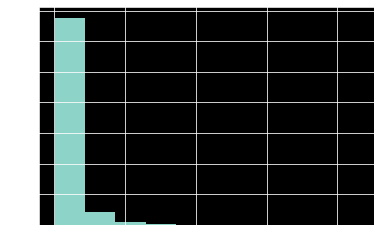

In [ ]:
df['cancellations_time_in_seconds'].hist()

In [ ]:
t = df.groupby('hour')['is_driver_assigned_key'].agg(['count','mean'])

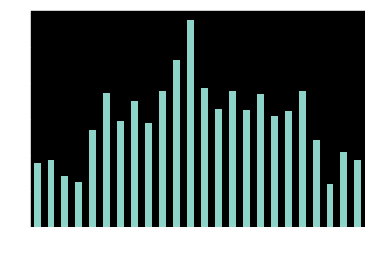

In [ ]:
t['mean'].plot(kind='bar')

In [ ]:
df[df['is_driver_assigned_key']==0].groupby('hour')['cancellations_time_in_seconds'].agg(['mean','median'])

,mean,median
hour,,
00,111.557047,89.0
01,98.132420,84.0
02,106.438819,87.0
03,104.361607,83.5
04,90.000000,65.5
05,121.800000,112.0
06,124.955224,85.0
07,112.628049,95.5
08,120.702179,95.0


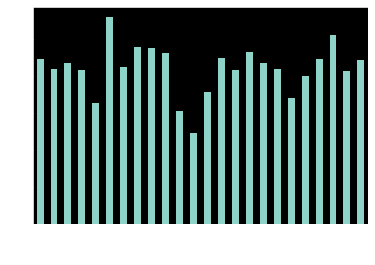

In [ ]:
df[df['is_driver_assigned_key']==0].groupby('hour')['cancellations_time_in_seconds'].median().plot(kind='bar')

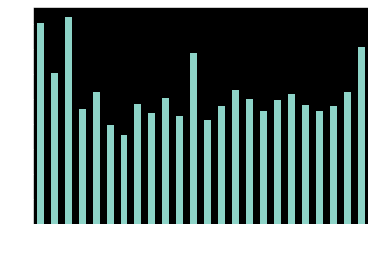

In [ ]:
df[df['is_driver_assigned_key']==1].groupby('hour')['cancellations_time_in_seconds'].median().plot(kind='bar')

In [ ]:
df.groupby('is_driver_assigned_key')['cancellations_time_in_seconds'].agg(['count','mean','median'])

,count,mean,median
is_driver_assigned_key,,,
0,4496,110.371441,88.0
1,2811,233.897901,127.0


Если водитель не назначен, то время до отмены значительно ниже. По часам время до отмены распределено практически равномерно

**4.** Постройте распределение среднего ЕТА по часам. Чем можно объяснить такой вид графика?

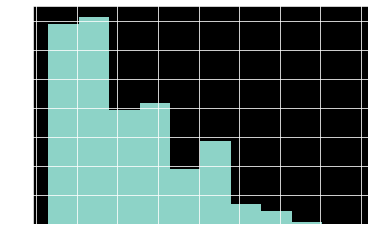

In [ ]:
df['m_order_eta'].hist()

In [ ]:
df['m_order_eta'].isna().mean()

0.7374020156774916

In [ ]:
df.groupby('hour')['m_order_eta'].agg(['count','median'])

,count,median
hour,,
00,122,298.0
01,88,297.5
02,78,298.0
03,64,328.0
04,41,238.0
05,25,358.0
06,47,359.0
07,156,584.5
08,314,658.0


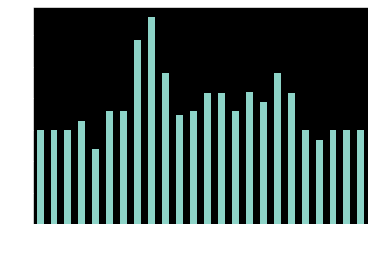

In [ ]:
df.groupby('hour')['m_order_eta'].median().plot(kind='bar')

Время до прибытия машины значительно выше в утренние часы пик (с 7 до 9)

5. Колонка drivers_offered - показывает сколько водителей увидели заказ и могли его принять. Постройте часовую разбивку среднего количества водителей которым был предложен заказ. Что можно сказать по ней про избыток/нехватку водителей в те или иные часы?

In [ ]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,fail,hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,0,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,0,20
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,0,12
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,0,13
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,1,21


In [ ]:
offers = pd.read_csv('/content/data_offers.csv')

In [ ]:
offers_by_order = offers.groupby('order_gk')['offer_id'].nunique().reset_index()

In [ ]:
offers_by_order

,order_gk,offer_id
0,3000551431542,1
1,3000551431560,2
2,3000551431566,5
3,3000551431577,2
4,3000551431592,7
...,...,...
97962,3000633196069,2
97963,3000633196079,1
97964,3000633196163,7
97965,3000633196174,2


In [ ]:
df = df.merge(offers_by_order,how='left',on='order_gk')

In [ ]:
df['offer_id'] = df['offer_id'].fillna(0)

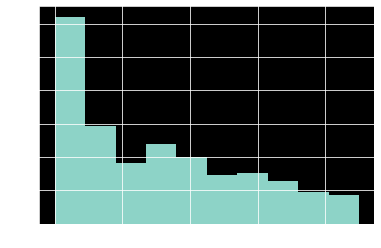

In [ ]:
df['offer_id'].hist()

In [ ]:
df.groupby('hour')['offer_id'].agg(['count','mean'])

,count,mean
hour,,
00,683,2.918009
01,471,2.770701
02,555,2.657658
03,513,2.764133
04,152,1.493421
05,67,1.656716
06,159,2.465409
07,447,3.503356
08,1082,3.572089


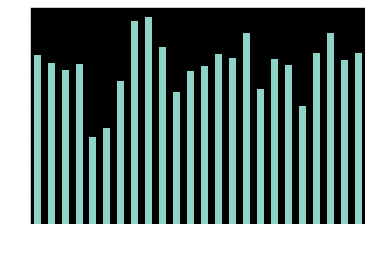

In [ ]:
df.groupby('hour')['offer_id'].mean().plot(kind='bar')

In [ ]:
df['offer_id'].mean()

2.917879805897723

Распределение по часам кол-во водитилей увидевших заказ практически равномерное. Исключение составляют 4 и 5 час утра: идет просадка в 2 раза, но это и самое неактивное время по кол-ву заказов.

**6*.** Гексаконы.
Воспользовавшись пакетами h3 и folium, посчитайте, сколько гексагонов размера 8 (https://uber.github.io/h3/#/documentation/core-library/resolution-table) содержат 80% всех заказов из исходного датасета и визуализируйте гексагон с наибольшим количеством фейлов на карте.

In [ ]:
! pip install h3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 12.7 MB/s 


In [ ]:
>>> import h3
>>> lat, lng = 37.769377, -122.388903
>>> resolution = 9
>>> h3.geo_to_h3(lat, lng, resolution)

'89283082e73ffff'

In [ ]:
def get_geksagon(row):
  return h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8)

In [ ]:
df['geksagon'] = df.apply(get_geksagon,axis=1)

In [ ]:
geksagon = df['geksagon'].value_counts().reset_index()

In [ ]:
len(df)

10716

In [ ]:
geksagon['geksagon'].sum()

10716

In [ ]:
geksagon['geksagon']

0      1497
1       870
2       774
3       707
4       667
       ... 
139       1
140       1
141       1
142       1
143       1
Name: geksagon, Length: 144, dtype: int64

In [ ]:
(geksagon['geksagon'].cumsum() / geksagon['geksagon'].sum()).head(30)

0     0.139698
1     0.220885
2     0.293113
3     0.359089
4     0.421333
5     0.482270
6     0.520903
7     0.555618
8     0.589399
9     0.621687
10    0.645670
11    0.665267
12    0.682437
13    0.699421
14    0.713979
15    0.728257
16    0.741601
17    0.753266
18    0.763998
19    0.773143
20    0.781728
21    0.790220
22    0.798152
23    0.805711
24    0.813177
25    0.820642
26    0.827548
27    0.833987
28    0.840332
29    0.846491
Name: geksagon, dtype: float64

In [ ]:
len(df)

10716

Ответ - 24 гексагонов

In [ ]:
24 / 144

0.16666666666666666

17% гексагонов содержат 80% всех заказов -- это почти прям классическое Парето 20 / 80

In [ ]:
df.groupby('geksagon')['fail'].sum().sort_values(ascending=False)

geksagon
88195d2b1dfffff    358
88195d2b1bfffff    256
88195d2b11fffff    225
88195d284dfffff    216
88195d2b15fffff    198
                  ... 
88195d2a1bfffff      0
88195d74d1fffff      0
88195d2807fffff      0
88195d74d5fffff      0
88195d281dfffff      0
Name: fail, Length: 144, dtype: int64

In [ ]:
df[df['geksagon'] == '88195d2b1dfffff']

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,fail,hour,offer_id,geksagon
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,0,12,6.0,88195d2b1dfffff
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,1,21,0.0,88195d2b1dfffff
22,08:37:53,-0.972037,51.456781,898.0,3000582816590,4,1,101.0,0,08,6.0,88195d2b1dfffff
24,14:08:23,-0.973763,51.458671,NaN,3000632271478,4,0,117.0,0,14,0.0,88195d2b1dfffff
37,20:30:04,-0.971564,51.458022,60.0,3000632445939,4,1,27.0,0,20,3.0,88195d2b1dfffff
...,...,...,...,...,...,...,...,...,...,...,...,...
10699,16:55:04,-0.971480,51.458364,113.0,3000629956882,4,1,244.0,0,16,3.0,88195d2b1dfffff
10700,08:48:00,-0.973398,51.458384,NaN,3000579775743,4,0,108.0,0,08,7.0,88195d2b1dfffff
10705,13:18:03,-0.972926,51.457693,NaN,3000599187042,4,0,10.0,0,13,0.0,88195d2b1dfffff
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0,0,13,1.0,88195d2b1dfffff


In [ ]:
geksagon

,index,geksagon
0,88195d2b1dfffff,1497
1,88195d2b1bfffff,870
2,88195d2b15fffff,774
3,88195d2b11fffff,707
4,88195d2b19fffff,667
...,...,...
139,88195d2821fffff,1
140,88195d3993fffff,1
141,88195d2b69fffff,1
142,88195d74d5fffff,1


In [ ]:
loc = df[df['geksagon'] == '88195d2b1dfffff'][['origin_latitude','origin_longitude']].iloc[2].values

In [ ]:
loc

array([51.456781, -0.972037])

In [ ]:
moscow = [55.7526,37.6199]

In [ ]:
markers = df[df['geksagon'] == '88195d2b1dfffff'][['origin_latitude','origin_longitude','fail']].values

In [ ]:
for m in markers[:10]:
  print(m)

[51.455544 -0.96952   0.      ]
[51.458236 -0.967605  1.      ]
[51.456781 -0.972037  0.      ]
[51.458671 -0.973763  0.      ]
[51.458022 -0.971564  0.      ]
[51.456599 -0.975043  0.      ]
[51.457899 -0.970932  0.      ]
[51.456873 -0.972893  0.      ]
[51.458636 -0.974003  0.      ]
[51.454786 -0.966518  0.      ]


In [ ]:
import folium


m = folium.Map(location = loc,
               zoom_start = 15)

In [ ]:
for marker in markers:
  color = 'blue'
  if marker[2] == 1:
    color = 'red'

  folium.CircleMarker(
    location=[marker[0], marker[1]],
    radius=1,
    fill=True, # Set fill to True
    fill_color=color,
    color = color,
).add_to(m)

In [ ]:
m